**Data Source: https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression**
# Data's demographic:
• Sex: male(2) or female(0) (Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
# The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
#The dataset provides the patients’ information
heartDiseaseData = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
heartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


As you can see my labels are ordered -male = 1, female = 0-. Then i need to delete that useless features.

In [3]:
#heartDiseaseData.drop(["education"], axis = 1, inplace = True) # Delete useless feature.
heartDiseaseData.dropna(how="any", inplace = True)  # Delete useless raw

chd = heartDiseaseData.TenYearCHD.values 
featurees = heartDiseaseData.drop(["TenYearCHD"], axis = 1) # features before normalization
featurees

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


# **NORMALIZATION**

Formula = (x -min(x))/(max(x)-min(x)


In [4]:
features = (featurees - np.min(featurees))/(np.max(featurees) - np.min(featurees)).values # features after normalization
features

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.0,0.684211,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.151951,0.271868,0.349206,0.228308,0.363636,0.115819
4232,1.0,0.947368,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096


# **TRAIN-TEST SPLIT**

Train Test Split data==> 80% of data set for Train, 20% of data set for Test

In [5]:
from sklearn.model_selection import train_test_split
features_train, features_test, chd_train, chd_test = train_test_split(features, chd ,test_size = 0.2 , random_state = 42)
# test_size ==> 80% of data set for Train, 20% of data set for Test


features_train = features_train.T
features_test = features_test.T
chd_train = chd_train.T
chd_test = chd_test.T

print("Changed of Features and Values place.")

print("features_train: ", features_train.shape)
print("features_test ", features_test.shape)
print("chd_train: ", chd_train.shape)
print("chd_test: ", chd_test.shape)

Changed of Features and Values place.
features_train:  (15, 2924)
features_test  (15, 732)
chd_train:  (2924,)
chd_test:  (732,)


# **PARAMETER INITALIZE AND SIGMOID FUNCTION**

Time to start defining functions.First of all I need to initialize my weights and bias, then I will need a sigmoid function.

Sigmoid Function : f(x) = 1 / ( 1 + (e ^ -x)
Initialize weight = 0.01 for each data
Initialize bias = 0

In [6]:
def initialize_weights_and_bias(dimension):
    
    weights = np.full((dimension,1), 0.01) 
    bias = 0.0 
    return weights,bias
    
def sigmoid(z):
    chd_head = 1/(1+np.exp(-z))
    return chd_head

# **FORWARD AND BACKWARD PROPAGATION FUNCTION**
z = bias + px1w1 + px2w2 + ... + pxn*wn
loss function = -(1 - y) log(1- y_head) - y log(y_head)
cost function = sum(loss value) / train dataset sample count

In [7]:
def forward_backward_propagation(weights, bias , features_train, chd_train):
    #forward propagation
    
    z = np.dot(weights.T,features_train) + bias
    chd_head = sigmoid(z)
    loss = -chd_train*np.log(chd_head) - (1- chd_train)*np.log(1-chd_head)
    cost = (np.sum(loss))/features_train.shape[1]
    
    #backward propagation
    derivative_weights = (np.dot(features_train,((chd_head-chd_train).T)))/features_train.shape[1] 
    derivative_bias = np.sum(chd_head-chd_train)/features_train.shape[1] 
    gradients = {"derivative_weights" : derivative_weights, "derivative_bias" : derivative_bias}
    return cost,gradients

# **UPDATE**
Update weights and bias with backward-forward propagation.

In [8]:
def update(weights, bias, features_train, chd_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterations):
        
        cost, gradients = forward_backward_propagation(weights, bias, features_train, chd_train)
        cost_list.append(cost)
        
        weights = weights - learning_rate* gradients["derivative_weights"]
        bias = bias - learning_rate*gradients["derivative_bias"]
        
        if i % 10 == 0: # her 10 adımda bir depolar
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f " %(i,cost))
            
        
    parameters =  {"weights" : weights, "bias" : bias}
    plt.plot(index,cost_list2)
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# **PREDICT**
Predict function for testing purposes.

In [9]:
def predict(weights, bias, features_test):
    
    z = sigmoid(np.dot(weights.T,features_test)+bias)
    chd_prediction = np.zeros((1,features_test.shape[1]))
    
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5 :
            chd_prediction[0,i] = 0
        else:
            chd_prediction[0,i] = 1
            
    return chd_prediction

# **LOGISTIC REGRESSION**
Main part.
Put it all together.

Cost after iterations 0: 0.705554 
Cost after iterations 10: 0.401080 
Cost after iterations 20: 0.389677 
Cost after iterations 30: 0.383909 
Cost after iterations 40: 0.380201 
Cost after iterations 50: 0.377660 
Cost after iterations 60: 0.375852 
Cost after iterations 70: 0.374521 
Cost after iterations 80: 0.373509 
Cost after iterations 90: 0.372717 
Cost after iterations 100: 0.372080 
Cost after iterations 110: 0.371557 
Cost after iterations 120: 0.371118 
Cost after iterations 130: 0.370745 
Cost after iterations 140: 0.370422 
Cost after iterations 150: 0.370141 
Cost after iterations 160: 0.369893 
Cost after iterations 170: 0.369674 
Cost after iterations 180: 0.369477 
Cost after iterations 190: 0.369301 
Cost after iterations 200: 0.369143 
Cost after iterations 210: 0.368999 
Cost after iterations 220: 0.368869 
Cost after iterations 230: 0.368751 
Cost after iterations 240: 0.368642 
Cost after iterations 250: 0.368543 
Cost after iterations 260: 0.368452 
Cost after i

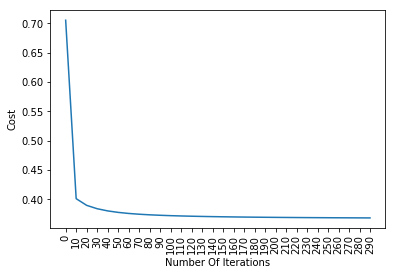

Test occuracy: 83.7431693989071% 


In [10]:
# def logistic_regression(features_train, chd_train, features_test, chd_test, learning_rate, number_of_iterations):
#     dimension = features_train.shape[0] # that is 14(features)
#     weights, bias = initialize_weights_and_bias(dimension)
    
#     parameters, gradients, cost_list = update(weights, bias, features_train, chd_train, learning_rate, number_of_iterations) 
    
#     chd_prediction_test = predict(parameters["weights"], parameters["bias"], features_test)
    
#     print("Test occuracy: {}% ".format(100-np.mean(np.abs(chd_prediction_test - chd_test))*100))
    
# logistic_regression(features_train, chd_train, features_test, chd_test, learning_rate = 5, number_of_iterations = 300) 

# **Logistic Regression with Sklearn Library**

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train.T,chd_train.T)
print("test accuracy {}".format(lr.score(features_test.T,chd_test.T)))
features_train = features_train.T
chd_train = chd_train.T
features_test = features_test.T
chd_test = chd_test.T

test accuracy 0.837431693989071
